In [2]:
from IPython.display import Image

* Clustering is an attempt to create labels for unsupervised data.
* There is no historical labeled data

#### The main goal is to divide data into distinct groups so that observations within each group are similar

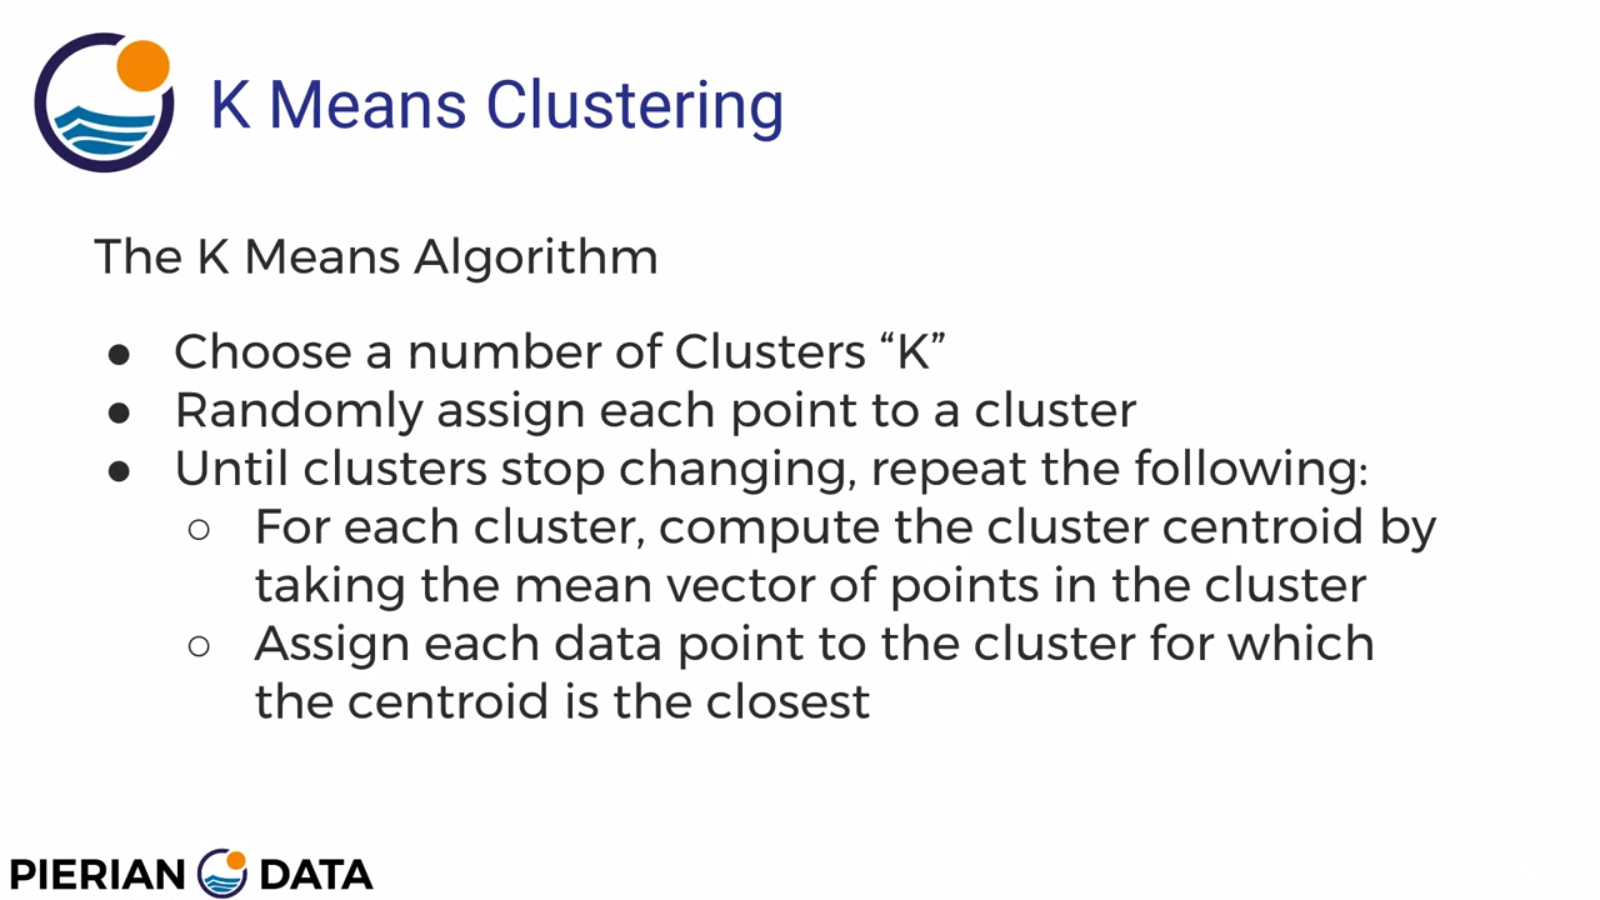

In [3]:
Image(filename='data/K-means_algo.png')

* K value depends on domain knowledge
* One way is the elbow method
    * Compute the SSE(sum of squared error) for some value of k
    * SSE is the sum of squared distance from each member of cluster to centroid
    * As k increases, SSE decreases, since the cluster size decrease.
    * Choose k at which SSE decrease sharply(elbow effect).

* In unsupervised learning, we cant check to see how our algorithm performed
* Selecting k-value depends on domain knowledge


In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName('kmeans').getOrCreate()

In [6]:
from pyspark.ml.clustering import KMeans

In [13]:
data = spark.read.csv('data/seeds_dataset.csv',header=True, inferSchema=True)

In [14]:
data.describe().show()

+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+
|summary|              area|         perimeter|         compactness|   length_of_kernel|   width_of_kernel|asymmetry_coefficient|   length_of_groove|
+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+
|  count|               210|               210|                 210|                210|               210|                  210|                210|
|   mean|14.847523809523816|14.559285714285718|  0.8709985714285714|  5.628533333333335| 3.258604761904762|   3.7001999999999997|  5.408071428571429|
| stddev|2.9096994306873647|1.3059587265640225|0.023629416583846364|0.44306347772644983|0.3777144449065867|   1.5035589702547392|0.49148049910240543|
|    min|             10.59|             12.41|              0.8081|              4.899|            

In [16]:
data.printSchema()

root
 |-- area: double (nullable = true)
 |-- perimeter: double (nullable = true)
 |-- compactness: double (nullable = true)
 |-- length_of_kernel: double (nullable = true)
 |-- width_of_kernel: double (nullable = true)
 |-- asymmetry_coefficient: double (nullable = true)
 |-- length_of_groove: double (nullable = true)



In [17]:
from pyspark.ml.feature import VectorAssembler

In [19]:
data.columns

['area',
 'perimeter',
 'compactness',
 'length_of_kernel',
 'width_of_kernel',
 'asymmetry_coefficient',
 'length_of_groove']

In [23]:
assembler = VectorAssembler(inputCols=['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel',
                                        'asymmetry_coefficient', 'length_of_groove'],outputCol='features')

In [24]:
final_data = assembler.transform(data)

In [26]:
final_data.columns

['area',
 'perimeter',
 'compactness',
 'length_of_kernel',
 'width_of_kernel',
 'asymmetry_coefficient',
 'length_of_groove',
 'features']

In [27]:
output = final_data.select('features')

In [28]:
from pyspark.ml.feature import StandardScaler

In [29]:
scaler = StandardScaler(inputCol='features',outputCol='scaledfeatures')

In [30]:
model = scaler.fit(output)

In [32]:
final_data = model.transform(output)

In [33]:
kmeans = KMeans(k=3, featuresCol='scaledfeatures')

In [34]:
model = kmeans.fit(final_data)

In [38]:
print(model.computeCost(final_data))

428.60820118716356


In [35]:
model.transform(final_data)

DataFrame[features: vector, scaledfeatures: vector, prediction: int]

In [40]:
centers = model.clusterCenters()

In [41]:
centers

[array([  6.35645488,  12.40730852,  37.41990178,  13.93860446,
          9.7892399 ,   2.41585013,  12.29286107]),
 array([  4.07497225,  10.14410142,  35.89816849,  11.80812742,
          7.54416916,   3.15410901,  10.38031464]),
 array([  4.96198582,  10.97871333,  37.30930808,  12.44647267,
          8.62880781,   1.80061978,  10.41913733])]